In [1]:
import os
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
# Specify the folder containing the CSV files
folder_path = r"C:\Users\acer\Documents\python project\WorldCup_Stats"


# List all CSV files in the folder
csv_files = [file for file in os.listdir(folder_path) if file.endswith('.csv')]

# Load all CSV files into a list of DataFrames
dataframes = [pd.read_csv(os.path.join(folder_path, file)) for file in csv_files]

# Concatenate all DataFrames into a single DataFrame
crick_df = pd.concat(dataframes, ignore_index=True)

# Display the resulting DataFrame
print(crick_df)

     Unnamed: 0.1  Unnamed: 0        date        venue match_category team_1  \
0               0          11         NaN   Nottingham   League-Match    PAK   
1               1           5         NaN        Leeds   League-Match    EAf   
2               2          12  1975-06-18        Leeds     Semi-Final    ENG   
3               3           8  1975-06-14   Birmingham   League-Match    ENG   
4               4          13         NaN     The Oval     Semi-Final     NZ   
..            ...         ...         ...          ...            ...    ...   
523            45          18  2023-10-21      Lucknow   League-Match    NED   
524            46          40  2023-11-09    Bengaluru   League-Match     SL   
525            47           1  2023-10-06    Hyderabad   League-Match    PAK   
526            48          44  2023-11-12    Bengaluru   League-Match    IND   
527            49           6  2023-10-10   Dharamsala   League-Match    ENG   

    team_2  team_1_runs  team_1_wickets

Table of team_1 Pie Chart Data:
                  Team  Count  Percentage
team_1                                   
AUS                AUS     62        11.7
IND                IND     53        10.0
ENG                ENG     50         9.5
SL                  SL     50         9.5
PAK                PAK     49         9.3
NZ                  NZ     45         8.5
WI                  WI     40         7.6
SA                  SA     37         7.0
ZIM                ZIM     33         6.2
BAN                BAN     24         4.5
KENYA            KENYA     17         3.2
AFG                AFG     13         2.5
NED                NED     12         2.3
CAN                CAN     11         2.1
IRE                IRE     10         1.9
SCOT              SCOT      9         1.7
UAE                UAE      6         1.1
Australia    Australia      2         0.4
BER                BER      1         0.2
EAf                EAf      1         0.2
Pakistan      Pakistan      1         0.2
In

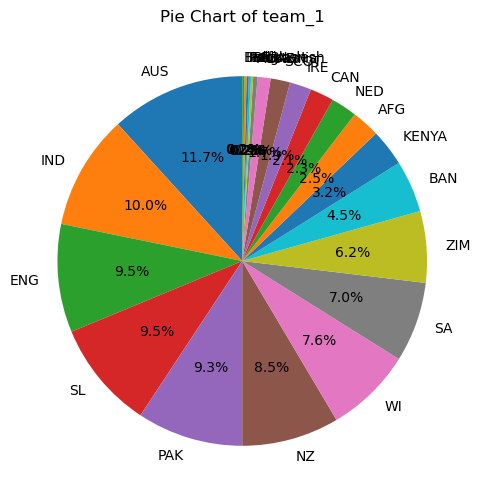

In [3]:
# Assuming crick_df is your DataFrame
# Count the values for the 'team_1' column
team_1_counts = crick_df['team_1'].value_counts()

# Create a DataFrame for the table
table_data = pd.DataFrame({
    'Team': team_1_counts.index,
    'Count': team_1_counts.values,
    'Percentage': (team_1_counts / team_1_counts.sum() * 100).round(1)
})

# Display the table
print("Table of team_1 Pie Chart Data:")
print(table_data)

# Plot the pie chart
plt.figure(figsize=(6, 6))
plt.pie(
    team_1_counts,
    labels=team_1_counts.index,  # Add category names as labels
    autopct='%1.1f%%',           # Show percentages on the pie chart
    startangle=90                # Rotate the chart for better readability
)

# Add title and show the plot
plt.title('Pie Chart of team_1')
plt.show()


In [4]:
# Replace country names with abbreviations in 'team_1' and 'team_2' columns
crick_df[['team_1', 'team_2']] = crick_df[['team_1', 'team_2']].replace({
    'Australia': 'AUS',
    'Pakistan': 'PAK',
    'India': 'IND',
    'Bangladesh': 'BAN',
    'New Zealand':'NZ',
    'West Indies': 'WI',
    'Sri Lanka':'SL'
})

# Display the updated DataFrame
print(crick_df)


     Unnamed: 0.1  Unnamed: 0        date        venue match_category team_1  \
0               0          11         NaN   Nottingham   League-Match    PAK   
1               1           5         NaN        Leeds   League-Match    EAf   
2               2          12  1975-06-18        Leeds     Semi-Final    ENG   
3               3           8  1975-06-14   Birmingham   League-Match    ENG   
4               4          13         NaN     The Oval     Semi-Final     NZ   
..            ...         ...         ...          ...            ...    ...   
523            45          18  2023-10-21      Lucknow   League-Match    NED   
524            46          40  2023-11-09    Bengaluru   League-Match     SL   
525            47           1  2023-10-06    Hyderabad   League-Match    PAK   
526            48          44  2023-11-12    Bengaluru   League-Match    IND   
527            49           6  2023-10-10   Dharamsala   League-Match    ENG   

    team_2  team_1_runs  team_1_wickets

In [5]:
# Remove rows with null values (where all cells are NaN)
df_cleaned = crick_df.dropna(how='all')

# Remove columns with all NA values
df_cleaned = df_cleaned.dropna(axis=1, how='all')

# Remove duplicate rows based on specific columns
df_cleaned = df_cleaned.drop_duplicates(subset=['team_1', 'team_2', 'team_1_runs', 'team_1_wickets', 'team_2_runs', 'team_2_wickets'])

# Display the cleaned DataFrame
print(df_cleaned)

     Unnamed: 0.1  Unnamed: 0        date        venue match_category team_1  \
0               0          11         NaN   Nottingham   League-Match    PAK   
1               1           5         NaN        Leeds   League-Match    EAf   
2               2          12  1975-06-18        Leeds     Semi-Final    ENG   
3               3           8  1975-06-14   Birmingham   League-Match    ENG   
4               4          13         NaN     The Oval     Semi-Final     NZ   
..            ...         ...         ...          ...            ...    ...   
523            45          18  2023-10-21      Lucknow   League-Match    NED   
524            46          40  2023-11-09    Bengaluru   League-Match     SL   
525            47           1  2023-10-06    Hyderabad   League-Match    PAK   
526            48          44  2023-11-12    Bengaluru   League-Match    IND   
527            49           6  2023-10-10   Dharamsala   League-Match    ENG   

    team_2  team_1_runs  team_1_wickets

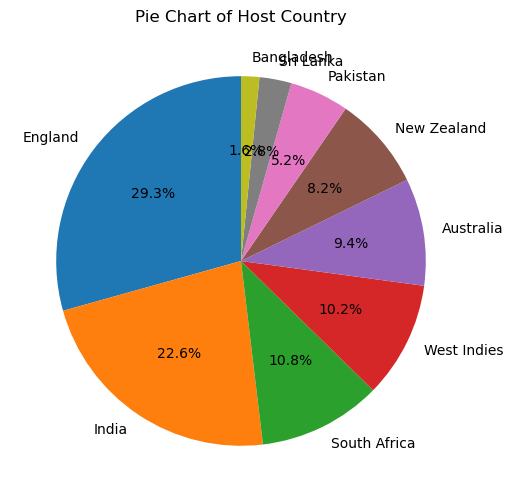

In [6]:
# Assuming df_cleaned is your DataFrame
# Plot the pie chart for the 'host_country' column

df_cleaned['host_country'].value_counts().plot.pie(
    autopct='%1.1f%%',  # Show percentages
    figsize=(6, 6),     # Set figure size
    labels=df_cleaned['host_country'].value_counts().index,  # Add category names as labels
    startangle=90       # Rotate the chart for better readability
)

# Add title and show the plot
plt.title('Pie Chart of Host Country')
plt.ylabel('')  # Remove the y-axis label for a cleaner look
plt.show()

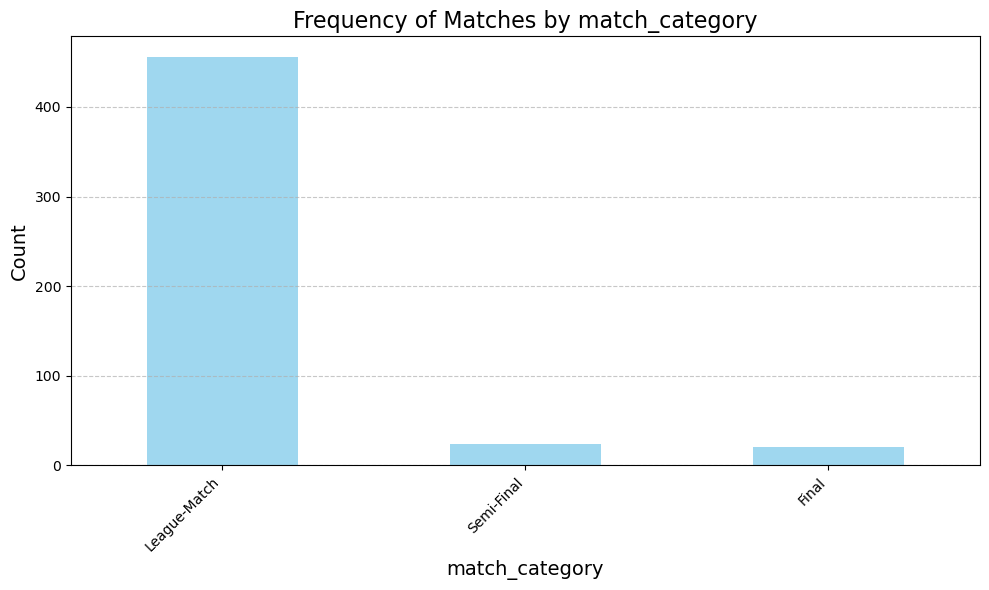

In [7]:
# Calculate the counts of unique values in the 'match_category' column
match_category_counts = df_cleaned['match_category'].value_counts()

# Plot the bar graph for the summarized counts
plt.figure(figsize=(10, 6))
match_category_counts.plot(kind='bar', color='skyblue', alpha=0.8)

# Step 3: Customize the graph
plt.title('Frequency of Matches by match_category', fontsize=16)
plt.xlabel('match_category', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Show the plot
plt.tight_layout()
plt.show()


In [8]:
# Descriptive statistics for the specified columns
descriptive_stats = df_cleaned[['team_1_runs', 'team_2_runs']].describe()

print(descriptive_stats)


       team_1_runs  team_2_runs
count   493.000000   488.000000
mean    243.212982   198.725410
std      74.736375    59.996461
min       1.000000    24.000000
25%     197.000000   158.000000
50%     244.000000   202.500000
75%     291.000000   235.000000
max     428.000000   383.000000


In [9]:
# Descriptive statistics for the specified columns
descriptive_stats_1 = df_cleaned[['team_1_wickets', 'team_2_wickets']].describe()

print(descriptive_stats_1)


       team_1_wickets  team_2_wickets
count      493.000000      488.000000
mean         4.592292        2.745902
std          3.455010        3.025047
min          0.000000        0.000000
25%          0.000000        0.000000
50%          6.000000        2.000000
75%          7.000000        5.000000
max          9.000000        9.000000


In [10]:
# Get the current working directory
current_dir = os.getcwd()

# Define the file name
file_name = 'output_new.csv'

# Construct the full file path
file_path = os.path.join(current_dir, file_name)

# Save the DataFrame to the CSV file at the specified location
try:
    df_cleaned.to_csv(file_path, index=False)
    print(f"File saved successfully at: {file_path}")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

# Verify the saved file
print("Files in the current directory:", os.listdir(current_dir))



File saved successfully at: c:\Users\acer\Documents\python project\Group_17\output_new.csv
Files in the current directory: ['.git', 'data exploration and visualization.ipynb', 'output_new.csv', 'README.md', 'Task2', 'Task2.ipynb']


In [11]:
# Step 1: Create match_status column
# If 'result' contains 'abandoned', set match_status to 'abandoned'; otherwise, 'played'
crick_df['match_status'] = crick_df['result'].apply(
    lambda x: 'abandoned' if 'abandoned' in x.lower() else 'played'
)


In [12]:
# Step 2: Create winning_team column
def extract_winning_team(result):
    if 'abandoned' in result.lower():
        return None
    elif 'won by' in result:
        return result.split(' won by')[0]
    return None

crick_df['winning_team'] = crick_df['result'].apply(extract_winning_team)

In [13]:
# Step 3: Extract best_batters and best_bowlers into new columns
# Split and process 'best_batters'
def split_batters(batter_list):
    if isinstance(batter_list, list) and len(batter_list) > 0:
        # Extract names and runs
        batters = [b.split(' - ')[0] for b in batter_list]
        runs = [int(b.split(' - ')[1].split()[0]) for b in batter_list]
        return batters + runs
    return [None, None, None, None]  # Fill missing values if no data

# Create new columns for batters
crick_df[['best_batter_1', 'best_batter_2', 'best_batter_1_runs', 'best_batter_2_runs']] = crick_df['best_batters'].apply(
    split_batters
).apply(pd.Series)

In [14]:
# Split and process 'best_bowlers'
def split_bowlers(bowler_list):
    if isinstance(bowler_list, list) and len(bowler_list) > 0:
        # Extract names and wickets
        bowlers = [b.split(' - ')[0] for b in bowler_list]
        wickets = [int(b.split(' - ')[1]) for b in bowler_list]
        return bowlers + wickets
    return [None, None, None, None]  # Fill missing values if no data

# Create new columns for bowlers
crick_df[['best_bowler_1', 'best_bowler_2', 'best_bowler_1_wick', 'best_bowler_2_wick']] = crick_df['best_bowlers'].apply(
    split_bowlers
).apply(pd.Series)

# Step 4: Final Preview of the DataFrame
print(crick_df[['match_status', 'winning_team', 'best_batter_1', 'best_batter_2', 'best_batter_1_runs', 'best_batter_2_runs', 
                'best_bowler_1', 'best_bowler_2', 'best_bowler_1_wick', 'best_bowler_2_wick']].head())

  match_status winning_team best_batter_1 best_batter_2 best_batter_1_runs  \
0       played     Pakistan          None          None               None   
1       played        India          None          None               None   
2       played    Australia          None          None               None   
3       played      England          None          None               None   
4       played  West Indies          None          None               None   

  best_batter_2_runs best_bowler_1 best_bowler_2 best_bowler_1_wick  \
0               None          None          None               None   
1               None          None          None               None   
2               None          None          None               None   
3               None          None          None               None   
4               None          None          None               None   

  best_bowler_2_wick  
0               None  
1               None  
2               None  
3           

In [15]:
# Get the current working directory
current_dir = os.getcwd()

# Define the file name
file_name = 'output_new_3.csv'

# Construct the full file path
file_path = os.path.join(current_dir, file_name)

# Save the DataFrame to the CSV file at the specified location
try:
    df_cleaned.to_csv(file_path, index=False)
    print(f"File saved successfully at: {file_path}")
except Exception as e:
    print(f"An error occurred while saving the file: {e}")

# Verify the saved file
print("Files in the current directory:", os.listdir(current_dir))

File saved successfully at: c:\Users\acer\Documents\python project\Group_17\output_new_3.csv
Files in the current directory: ['.git', 'data exploration and visualization.ipynb', 'output_new.csv', 'output_new_3.csv', 'README.md', 'Task2', 'Task2.ipynb']


In [16]:
# Clean the 'best_bowlers' column in df_cleaned
df_cleaned['best_bowlers'] = df_cleaned['best_bowlers'].str.replace(r"[\[\]']", "", regex=True).str.strip()

# Split the 'best_bowlers' data into two parts for bowler one and bowler two
df_cleaned[['bowler_one_data', 'bowler_two_data']] = df_cleaned['best_bowlers'].str.split(', ', expand=True)

# Extract and clean bowler one details (name and wickets)
df_cleaned['bowler_one'] = df_cleaned['bowler_one_data'].str.split(' - ').str[0].str.strip().fillna('NA')
df_cleaned['bowler_one_wicket'] = (
    df_cleaned['bowler_one_data']
    .str.split(' - ').str[1]  # Extract the number of wickets
    .str.replace(r"[^\d]", "", regex=True)  # Remove non-digit characters
    .fillna(0)  # Replace missing values with 0
    .astype(int)  # Convert to integer
)